In [1]:
import numpy as np
import pandas as pd

fandago_score_comparison = pd.read_csv('fandango_score_comparison.csv')
movie_ratings_16_17 = pd.read_csv('movie_ratings_16_17.csv')

fandago_score_comparison.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.3,...,3.90,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5
1,Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.0,...,3.55,4.5,4.0,3.5,4.0,3.5,249,65709,12640,0.5
2,Ant-Man (2015),80,90,64,8.1,7.8,5.0,4.5,4.00,4.5,...,3.90,4.0,4.5,3.0,4.0,4.0,627,103660,12055,0.5
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.2,...,2.70,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,3.5,3.0,0.70,1.4,...,2.55,0.5,1.5,1.5,1.5,2.5,88,19560,1021,0.5


In [2]:
fandago_separate_variables = fandago_score_comparison[['FILM', 'Fandango_Stars', 'Fandango_Ratingvalue', 'Fandango_votes', 'Fandango_Difference']].copy()
movie_ratings_16_17_variables = movie_ratings_16_17[['movie', 'year', 'fandango']].copy()

fandago_separate_variables.head(5)

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5
1,Cinderella (2015),5.0,4.5,12640,0.5
2,Ant-Man (2015),5.0,4.5,12055,0.5
3,Do You Believe? (2015),5.0,4.5,1793,0.5
4,Hot Tub Time Machine 2 (2015),3.5,3.0,1021,0.5


In [3]:
movie_ratings_16_17_variables.head(5)

,movie,year,fandango
0,10 Cloverfield Lane,2016,3.5
1,13 Hours,2016,4.5
2,A Cure for Wellness,2016,3.0
3,A Dog's Purpose,2017,4.5
4,A Hologram for the King,2016,3.0


The goal is to determine whether there has been any change in Fandago's rating after Hickey's Analysis.
The population interest is made regardless of the releasing year on all the movie ratings on the website

In [6]:
movie_ratings_16_17_variables.sample(10, random_state = 1)

,movie,year,fandango
108,Mechanic: Resurrection,2016,4.0
206,Warcraft,2016,4.0
106,Max Steel,2016,3.5
107,Me Before You,2016,4.5
51,Fantastic Beasts and Where to Find Them,2016,4.5
33,Cell,2016,3.0
59,Genius,2016,3.5
152,Sully,2016,4.5
4,A Hologram for the King,2016,3.0
31,Captain America: Civil War,2016,4.5


In [8]:
sum(fandago_separate_variables['Fandango_votes'] < 30)

0

In [9]:
fandago_separate_variables.head(3)

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5
1,Cinderella (2015),5.0,4.5,12640,0.5
2,Ant-Man (2015),5.0,4.5,12055,0.5


In [10]:
fandago_separate_variables['Year'] = fandago_separate_variables['FILM'].str[-5:-1]
fandago_separate_variables.head(5)

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference,Year
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5,2015
1,Cinderella (2015),5.0,4.5,12640,0.5,2015
2,Ant-Man (2015),5.0,4.5,12055,0.5,2015
3,Do You Believe? (2015),5.0,4.5,1793,0.5,2015
4,Hot Tub Time Machine 2 (2015),3.5,3.0,1021,0.5,2015


In [11]:
fandago_separate_variables['Year'].value_counts()

2015    129
2014     17
Name: Year, dtype: int64

In [17]:
fandago_2015 = fandago_separate_variables[fandago_separate_variables['Year'] == '2015'].copy()
fandago_2015['Year'].value_counts()

2015    129
Name: Year, dtype: int64

In [18]:
movie_ratings_16_17_variables['year'].value_counts()

2016    191
2017     23
Name: year, dtype: int64

In [22]:
fandago_2016 = movie_ratings_16_17_variables[movie_ratings_16_17_variables['year'] == 2016].copy()
fandago_2016['year'].value_counts()

2016    191
Name: year, dtype: int64

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')

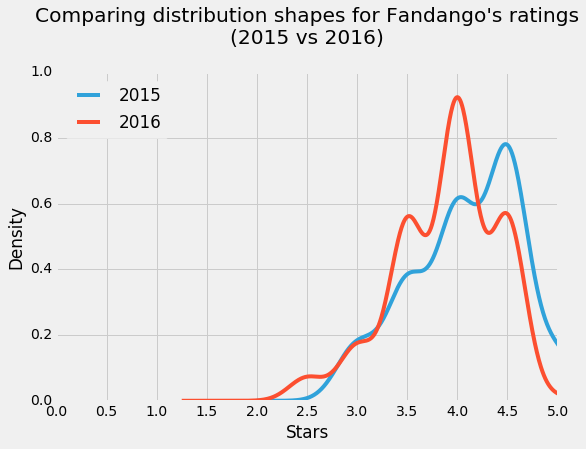

In [24]:
fandago_2015['Fandango_Stars'].plot.kde(label = '2015', legend = True, figsize = (8,5.5))
fandago_2016['fandango'].plot.kde(label = '2016', legend = True)
plt.title("Comparing distribution shapes for Fandango's ratings\n(2015 vs 2016)",
          y = 1.07)
plt.xlabel('Stars')
plt.xlim(0,5) 
plt.xticks(np.arange(0,5.1,.5))
plt.show()

Both Distributions are strongly left skewed.
The 2016 Distribution is slighly shifted to the left relative to the 2015 distribution


In [25]:
print('2015' + '\n' + '-' * 20)
fandago_2015['Fandango_Stars'].value_counts(normalize = True).sort_index() * 100

2015
--------------------


3.0     8.527132
3.5    17.829457
4.0    28.682171
4.5    37.984496
5.0     6.976744
Name: Fandango_Stars, dtype: float64

In [26]:
print('2016' + '\n' + '-' * 20)
fandago_2016['fandango'].value_counts(normalize = True).sort_index() * 100

2016
--------------------


2.5     3.141361
3.0     7.329843
3.5    24.083770
4.0    40.314136
4.5    24.607330
5.0     0.523560
Name: fandango, dtype: float64

In [28]:
mean_2015 = fandago_2015['Fandango_Stars'].mean()
mean_2016 = fandago_2016['fandango'].mean()

median_2015 = fandago_2015['Fandango_Stars'].median()
median_2016 = fandago_2016['fandango'].median()

mode_2015 = fandago_2015['Fandango_Stars'].mode()[0]
mode_2016 = fandago_2016['fandango'].mode()[0]

In [29]:
summary = pd.DataFrame()
summary['2015'] = [mean_2015, median_2015, mode_2015]
summary['2016'] = [mean_2016, median_2016, mode_2016]
summary.index = ['mean', 'median', 'mode']
summary

,2015,2016
mean,4.085271,3.887435
median,4.000000,4.000000
mode,4.500000,4.000000


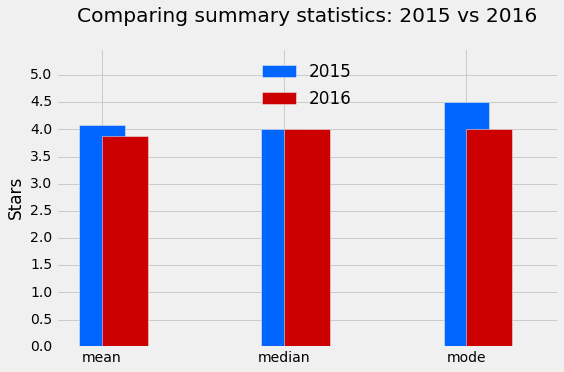

In [33]:
plt.style.use('fivethirtyeight')
summary['2015'].plot.bar(color = '#0066FF', align = 'center', label = '2015', width = .25)
summary['2016'].plot.bar(color = '#CC0000', align = 'edge', label = '2016', width = .25,
                         rot = 0, figsize = (8,5))

plt.title('Comparing summary statistics: 2015 vs 2016', y = 1.07)
plt.ylim(0,5.5)
plt.yticks(np.arange(0, 5.1, .5))
plt.ylabel('Stars')
plt.legend(framealpha = 0, loc = 'upper center')
plt.show()

Mean rating is lowe in 2016 compared to 2015. It mean ratings have been given lower in 2016. A decrease of 5%

In [34]:
(summary.loc['mean'][0] - summary.loc['mean'][1]) / summary.loc['mean'][0]

0.04842683568951993

Conclusion:
Popular movies released in 2016 were rated lower comparatively to the movies released in 2015.